In [167]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})

# Set the plot style as white.
sns.set_style('white')

In [2]:
# Using Excel: create copy of Spend column: Spend_new. many of Spend_new values are times or dates. 
# So I changed data type of Spend2 column into number. But that still leaves 402 rows with timestamp data

In [234]:
# Import modified dataset
df_creative = pd.read_excel('Change 2022 Creative Data writeback_091122_altered.xlsx')
df_creative

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.1
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [235]:
# Confirm data type of Spend2 is float. Also check for null values.
print(df_creative.shape)
print(df_creative.dtypes)
print(df_creative.info())

(102068, 22)
Requested URL Path                 object
Campaign                           object
Ad Format                          object
Clicks                            float64
Spend                              object
Creative - Size                    object
Date                       datetime64[ns]
Impressions                         int64
Reach                             float64
Audience                           object
Platform                           object
Creative - Family                  object
Creative - Version                 object
100% Video Views                  float64
Video Starts                      float64
Follows                           float64
Days away from max date             int64
Latest report?                      int64
CTR                               float64
CTR Score                         float64
Weighted CTR Score                float64
Spend_new                          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [236]:
# Make a copy of the dataframe before cleaning
df = df_creative.copy()
df

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.1
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [237]:
# Drop unnecessary columns : 'Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'
df.drop(['Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'], axis = 1, inplace=True)

# View the dataframe
df

,Campaign,Ad Format,Clicks,Creative - Size,Date,Impressions,Reach,Audience,Platform,Creative - Family,Creative - Version,100% Video Views,Video Starts,Follows,CTR,CTR Score,Weighted CTR Score,Spend_new
0,FY22,Single image,0.0,NaN,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.26
1,FY22,Single image,0.0,NaN,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.15
2,FY22,Single image,0.0,NaN,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.38
3,FY22,Single image,0.0,NaN,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.19
4,FY22,Single image,1.0,NaN,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,NaN,NaN,2022-05-01,3,3.0,General Targetting,OTT,CloserTwins,15s,NaN,NaN,NaN,NaN,NaN,NaN,0.1
102064,MTV,TV,NaN,NaN,2022-05-01,5,5.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.17
102065,Food Network,TV,NaN,NaN,2022-05-01,4,4.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.14
102066,Nat Geo TV,TV,NaN,NaN,2022-05-01,17,16.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.58


In [238]:
# Rename columns

df.rename({'Ad Format' : 'Ad_Format',
           'Creative - Family': 'Creative_Family',
           'Creative - Version': 'Creative_Version',
           '100% Video Views': '100%_Video_Views',
           'Video Starts': 'Video_Starts',
           'CTR Score': 'CTR_Score', 'Weighted CTR Score':'Weighted_CTR_Score',
           'Spend_new' : 'Spend'}, axis=1, inplace=True)

In [239]:
# Change datatype of 'Spend' to float
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')
df['Spend'].dtype

dtype('float64')

In [240]:
print(df['Spend'].isnull().sum())

# Drop the rows with na in 'Spend'
df.dropna(subset=['Spend'], inplace=True)

402


In [241]:
df

,Campaign,Ad_Format,Clicks,Creative - Size,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
0,FY22,Single image,0.0,NaN,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.26
1,FY22,Single image,0.0,NaN,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.15
2,FY22,Single image,0.0,NaN,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.38
3,FY22,Single image,0.0,NaN,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.19
4,FY22,Single image,1.0,NaN,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,NaN,NaN,2022-05-01,3,3.0,General Targetting,OTT,CloserTwins,15s,NaN,NaN,NaN,NaN,NaN,NaN,0.10
102064,MTV,TV,NaN,NaN,2022-05-01,5,5.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.17
102065,Food Network,TV,NaN,NaN,2022-05-01,4,4.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.14
102066,Nat Geo TV,TV,NaN,NaN,2022-05-01,17,16.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.58


In [242]:
df.drop(['Creative - Size'], axis=1, inplace =True)

In [243]:
# Determine the number of missing values
df.isnull().sum()

Campaign                 72
Ad_Format                71
Clicks                11877
Date                      0
Impressions               0
Reach                 21237
Audience                 41
Platform                  0
Creative_Family         883
Creative_Version        525
100%_Video_Views      77230
Video_Starts          76217
Follows               93266
CTR                   12829
CTR_Score             27050
Weighted_CTR_Score    27050
Spend                     0
dtype: int64

In [244]:
# Percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

Follows               91.737651
100%_Video_Views      75.964433
Video_Starts          74.968033
Weighted_CTR_Score    26.606732
CTR_Score             26.606732
Reach                 20.888989
CTR                   12.618771
Clicks                11.682372
Creative_Family        0.868530
Creative_Version       0.516397
Campaign               0.070820
Ad_Format              0.069837
Audience               0.040328
Platform               0.000000
Impressions            0.000000
Date                   0.000000
Spend                  0.000000
dtype: float64

In [245]:
len(df['Clicks'].loc[df['Platform']=='OTT'])

11877

In [246]:
df['Clicks'].isna().sum()

11877

In [247]:
# Use fillna() to replace NaN with 0 for 'Clicks', 'Reach','100%_Video_Views','Video_Starts', 'Follows', 'CTR',
# 'CTR_Score', 'Weighted_CTR_Score'
#df[['Clicks', 'Reach','100%_Video_Views','Video_Starts','Follows','CTR','CTR_Score','Weighted_CTR_Score']] = df[['Clicks', 'Reach', 'Follows']].fillna(0)

cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows', 'CTR', 'CTR_Score', 'Weighted_CTR_Score']
df[cols] = df[cols].fillna(0)

In [249]:
# Check sum of missing values in the dataframe
df.isna().sum().sort_values(ascending=False)

Creative_Family       883
Creative_Version      525
Campaign               72
Ad_Format              71
Audience               41
Date                    0
Impressions             0
Reach                   0
Platform                0
Clicks                  0
100%_Video_Views        0
Video_Starts            0
Follows                 0
CTR                     0
CTR_Score               0
Weighted_CTR_Score      0
Spend                   0
dtype: int64

In [250]:
df['Creative_Family'].fillna('No Answer', inplace=True)
df['Creative_Version'].fillna('No Answer', inplace=True)
df['Campaign'].fillna('No Answer', inplace=True)
df['Ad_Format'].fillna('No Answer', inplace=True)
df['Audience'].fillna('No Answer', inplace=True)

In [251]:
# Determine sum of missing values
df.isna().sum()

Campaign              0
Ad_Format             0
Clicks                0
Date                  0
Impressions           0
Reach                 0
Audience              0
Platform              0
Creative_Family       0
Creative_Version      0
100%_Video_Views      0
Video_Starts          0
Follows               0
CTR                   0
CTR_Score             0
Weighted_CTR_Score    0
Spend                 0
dtype: int64

In [252]:
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                       float64
Date                  datetime64[ns]
Impressions                    int64
Reach                        float64
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views             float64
Video_Starts                 float64
Follows                      float64
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [253]:
# Change datatypes from float to int for 'Clicks','Reach', '100%_Video_Views', 'Video_Starts', 'Follows' as these are integer values
cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows'] 
df[cols] = df[cols].astype(int)
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                         int64
Date                  datetime64[ns]
Impressions                    int64
Reach                          int64
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views               int64
Video_Starts                   int64
Follows                        int64
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [255]:
# Determine types of Ad_Formats
df['Ad_Format'].unique()
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7878
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1334
DESKTOP                    383
Follower ads               291
No Answer                   71
No lock campaign            28
Name: Ad_Format, dtype: int64

In [256]:
# Ad_Format = No lock campaign is invalid. 
# The corresponding 'Creative_Family' are invalid data and changed to 'Other'
df.loc[df['Ad_Format']== 'No lock campaign', 'Creative_Family'] = 'Other'

In [257]:
# Ad_Format= 'No lock campaign' checked against Campaign to replace with correct ad format. 
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Carousel'), 'Ad_Format'] = 'Carousel'
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Single DSC'), 'Ad_Format'] = 'Single image'
df.drop(df[df['Ad_Format'] == 'No lock campaign'].index, inplace=True)

In [259]:
#Types of 'Ad_Formats'
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7889
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1349
DESKTOP                    383
Follower ads               291
No Answer                   71
Name: Ad_Format, dtype: int64

In [260]:
df['Audience'].value_counts()

General Targetting    21681
4                     20574
1                     16472
3                     15996
5                     14339
2                     12559
No Answer                41
Domain Targeting          2
Name: Audience, dtype: int64

In [261]:
df.loc[df['Audience'] == 'Domain Targeting']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
62337,Domain Targeting - No Lock Campaign - Single D...,Single image,42,2022-09-06,8130,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.005166,1.5,12195.0,1914.60
62451,Domain Targeting - No Lock Campaign - Carousel...,Carousel,4,2022-09-06,665,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.006015,1.5,997.5,146.83


In [262]:
# Create new column Target_Group and assign Audience as per target group
audience_dict ={'1':'1', '2':'1', '3':'1',
               '4':'2', '5':'2',
               'General Targetting':'3'}
 
# Add a new column named 'Target_Group'
df['Target_Group'] = df['Audience'].map(audience_dict)

In [263]:
# Count of different target groups across the data
df['Target_Group'].value_counts()

1    45027
2    34913
3    21681
Name: Target_Group, dtype: int64

In [17]:
# Round the below columns to 2 decmial places for consistency 
# Also: Spend logically can't be more than 2 decimal places.
#decimals = 2
#creative_cleaned4['Spend2'] = creative_cleaned4['Spend2'].apply(lambda x: round(x, decimals))
#creative_cleaned4['CTR'] = creative_cleaned4['CTR'].apply(lambda x: round(x, decimals))
#creative_cleaned4['CTR Score'] = creative_cleaned4['CTR Score'].apply(lambda x: round(x, decimals))
#creative_cleaned4['Weighted CTR Score'] = creative_cleaned4['Weighted CTR Score'].apply(lambda x: round(x, decimals))
#creative_cleaned4.describe()

/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/1373136962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creative_cleaned4['Spend2'] = creative_cleaned4['Spend2'].apply(lambda x: round(x, decimals))
/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/1373136962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creative_cleaned4['CTR'] = creative_cleaned4['CTR'].apply(lambda x: round(x, decimals))
/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/137313696

,Clicks,Impressions,Reach,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend2
count,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000
mean,0.585356,505.064169,157.962247,26.437663,40.969780,0.005169,109.975003,0.048866,0.002101,0.515121,266.502993,7.787150
std,2.321076,1620.017822,557.469217,235.972957,354.391018,0.148158,61.769383,0.215588,0.014853,0.402394,904.325837,42.395824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.500000,1.500000,0.150000
50%,0.000000,70.000000,11.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.500000,20.500000,0.700000
75%,0.000000,327.000000,72.000000,0.000000,0.000000,0.000000,165.000000,0.000000,0.000000,0.500000,164.500000,3.590000
max,113.000000,59784.000000,16601.000000,14173.000000,19635.000000,11.000000,219.000000,1.000000,1.000000,1.500000,40845.000000,2706.460000


In [264]:
df

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3


In [265]:
df.Creative_Family.value_counts()

CloserTwins                      38332
UnfairAdvantage                  38183
CloseFaster                      15449
SEM Ads                           8613
No Answer                          883
CompetitiveOpportunity             114
Other                               26
Ad1 Domain                          15
Carousel Ad1                        14
Ad1 audience 1                       9
Carousel Ad1 - CRM Audience 1        6
Ad1 Audience 3 CRM                   5
Ad1                                  5
Carousel Ad1 - CRM Audience3         5
Carousel Ad2 - CRM Audience 2        5
Name: Creative_Family, dtype: int64

In [266]:
campaign_dict ={'CloserTwins':'CloserTwins', 'UnfairAdvantage':'UnfairAdvantage', 
                'CloseFaster':'CloseFaster', 'SEM Ads':'SEM Ads', 
                'No Answer':'Other', 
                'CompetitiveOpportunity':'CompetitiveOpportunity', 
                'Other':'Other', 'Ad1 Domain':'Other', 'Carousel Ad1':'Other', 
                'Ad1 audience 1':'Other', 'Carousel Ad1 - CRM Audience 1':'Other',
                'Ad1 Audience 3 CRM':'Other', 'Ad1':'Other', 
                'Carousel Ad1 - CRM Audience3':'Other', 
                'Carousel Ad2 - CRM Audience 2':'Other'}
 
# Add a new column named 'Campaign_Name'
df['Campaign_Name'] = df['Creative_Family'].map(campaign_dict)
df.Campaign_Name.value_counts()

CloserTwins               38332
UnfairAdvantage           38183
CloseFaster               15449
SEM Ads                    8613
Other                       973
CompetitiveOpportunity      114
Name: Campaign_Name, dtype: int64

In [ ]:
# Replace all values not in the allowed list of Creative family to 'Other'
# allowed_vals = ['CloserTwins','UnfairAdvantage','CloseFaster','SEM Ads','CompetitiveOpportunity']

# df.loc[~df['Creative_Family'].isin(allowed_vals), 'Creative_Family'] = "Other"

# Verify the 'Creative_Family' types
# df['Creative_Family'].value_counts()

In [267]:
df1 = df[df['Target_Group'] == '1']
df2 = df[df['Target_Group'] == '2']
df3 = df[df['Target_Group'] == '3']

In [342]:
df1_campaign = df1.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df1_campaign['CPC'] = df1_campaign['Spend'] / df1_campaign['Clicks']
df1_campaign['CTR'] = (df1_campaign['Clicks'] / df1_campaign['Impressions'])*100
df1_campaign.drop(df1_campaign[df1_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df1_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPC,CTR
0,CloseFaster,3282,1805930,14083.132090,4.291021,0.181735
1,CloserTwins,3995,2708066,41115.631535,10.291773,0.147522
3,UnfairAdvantage,6217,4093042,39366.966858,6.332148,0.151892


In [369]:
df1.groupby('Campaign_Name')[['Weighted_CTR_Score']].mean().reset_index()

,Campaign_Name,Weighted_CTR_Score
0,CloseFaster,153.445636
1,CloserTwins,101.514229
2,Other,24.031915
3,UnfairAdvantage,123.254855


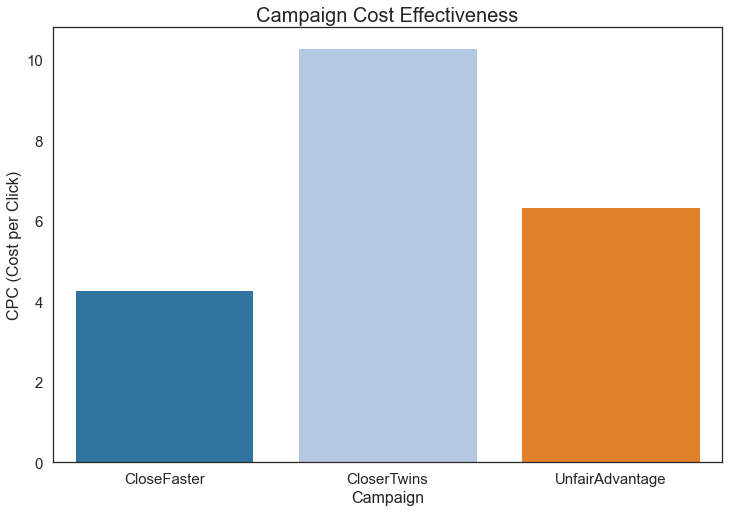

In [348]:
sns.barplot(data=df1_campaign, x='Campaign_Name', y='CPC', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

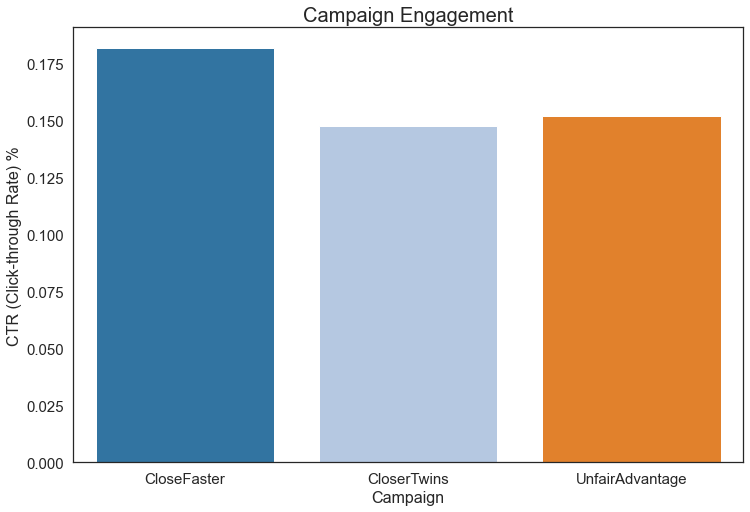

In [353]:
sns.barplot(data=df1_campaign, x='Campaign_Name', y='CTR', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CTR (Click-through Rate) %', fontsize=16)
plt.title('Campaign Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [296]:
df1.Platform.value_counts()

Domain Display     28466
User ID Display     5877
LinkedIn            4903
Facebook            2979
Instagram           2802
Name: Platform, dtype: int64

In [347]:
df1_platform = df1.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df1_platform['CPC'] = df1_platform['Spend'] / df1_platform['Clicks']
df1_platform['CTR'] = (df1_platform['Clicks'] / df1_platform['Impressions']) * 100
df1_platform

,Platform,Clicks,Impressions,Spend,CPC,CTR
0,Domain Display,1303,2739642,23881.933135,18.328421,0.047561
1,Facebook,1818,262991,5023.482582,2.763192,0.691278
2,Instagram,177,56001,1023.677626,5.783489,0.316066
3,LinkedIn,935,516285,39454.821303,42.197670,0.181102
4,User ID Display,9286,5033150,25847.311728,2.783471,0.184497


In [370]:
df1.groupby('Platform')[['Weighted_CTR_Score']].mean().reset_index()

,Platform,Weighted_CTR_Score
0,Domain Display,54.883053
1,Facebook,0.000000
2,Instagram,0.000000
3,LinkedIn,60.415868
4,User ID Display,611.639612


In original Dataset, Audience 1 advertisements on Facebook & Instagram had no

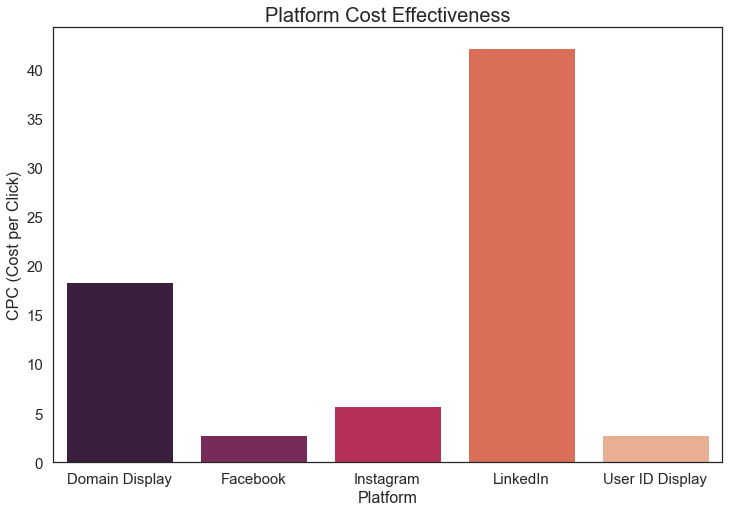

In [351]:
sns.barplot(data=df1_platform, x='Platform', y='CPC', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

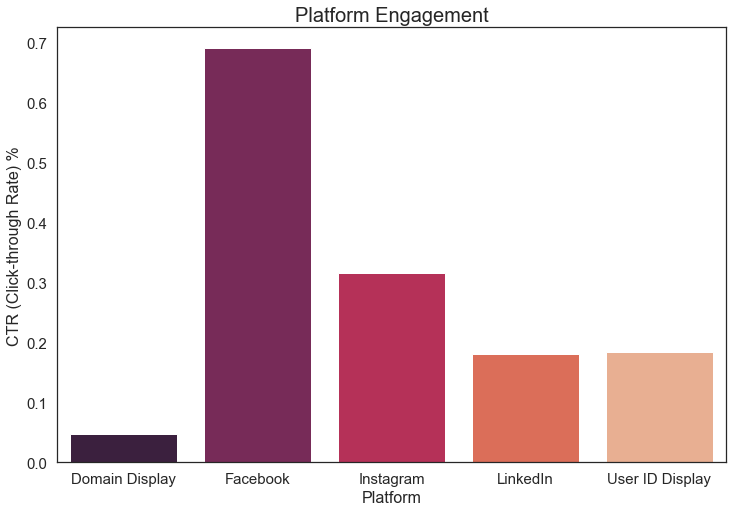

In [354]:
sns.barplot(data=df1_platform, x='Platform', y='CTR', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR (Click-through Rate) %', fontsize=16)
plt.title('Platform Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [336]:
df2_campaign = df2.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df2_campaign['CPC'] = df2_campaign['Spend'] / df2_campaign['Clicks']
df2_campaign['CTR'] = (df2_campaign['Clicks'] / df2_campaign['Impressions'])*100
df2_campaign.drop(df2_campaign[df2_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df2_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPC,CTR
0,CloseFaster,7499,4269441,43361.166342,5.782260,0.175644
1,CloserTwins,10072,9812880,101870.513593,10.114229,0.102641
3,UnfairAdvantage,20721,14590307,177776.173833,8.579517,0.142019


In [474]:
df2_cwctr = df2.groupby('Campaign_Name')[['Weighted_CTR_Score']].mean().reset_index()
df2_cwctr.drop(df2_cwctr[df2_cwctr['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df2_cwctr

,Campaign_Name,Weighted_CTR_Score
0,CloseFaster,426.337127
1,CloserTwins,540.649215
3,UnfairAdvantage,554.156644


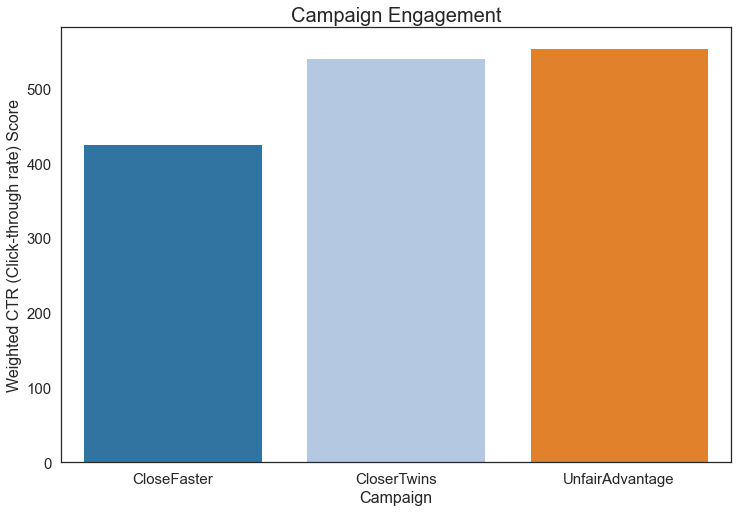

In [475]:
sns.barplot(data=df2_cwctr, x='Campaign_Name', y='Weighted_CTR_Score', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('Weighted CTR (Click-through rate) Score', fontsize=16)
plt.title('Campaign Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

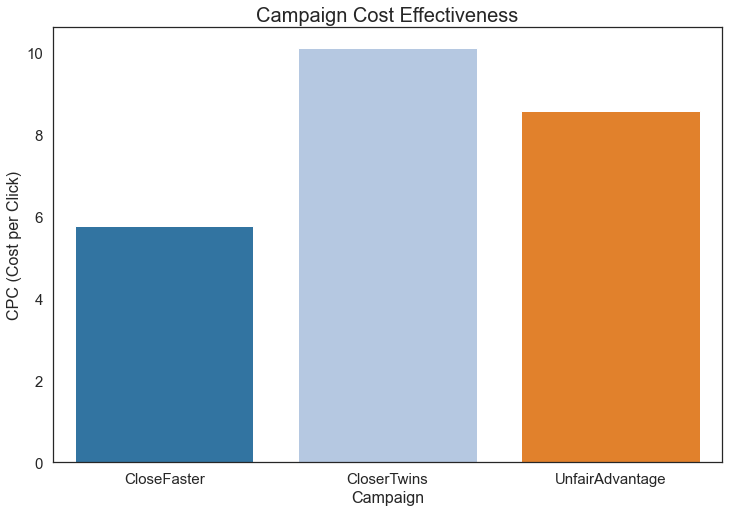

In [356]:
sns.barplot(data=df2_campaign, x='Campaign_Name', y='CPC', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [357]:
df2_platform = df2.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df2_platform['CPC'] = df2_platform['Spend'] / df2_platform['Clicks']
df2_platform['CTR'] = (df2_platform['Clicks'] / df2_platform['Impressions'])*100
df2_platform

,Platform,Clicks,Impressions,Spend,CPC,CTR
0,Domain Display,18115,19564371,133867.053908,7.389846,0.092592
1,LinkedIn,10456,3165406,160038.731038,15.305923,0.330321
2,User ID Display,10294,5998098,29331.148822,2.849344,0.171621


In [476]:
df2_pwctr = df2.groupby('Platform')[['Weighted_CTR_Score']].mean().reset_index()
df2_pwctr

,Platform,Weighted_CTR_Score
0,Domain Display,472.081523
1,LinkedIn,779.995855
2,User ID Display,600.417488


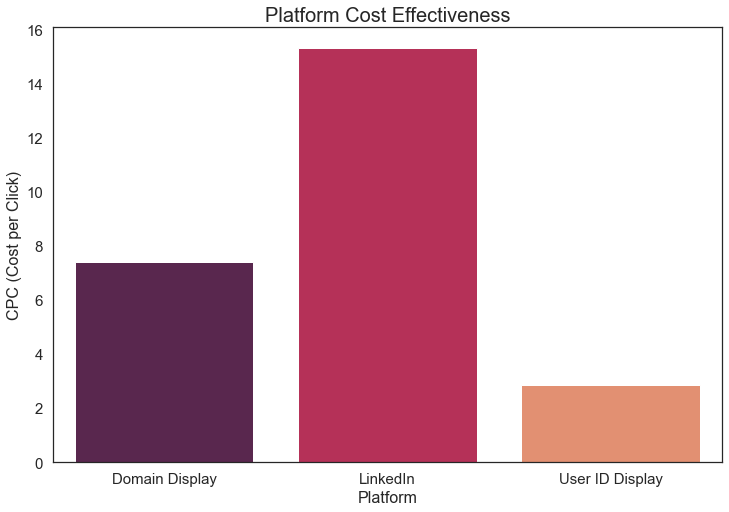

In [358]:
sns.barplot(data=df2_platform, x='Platform', y='CPC', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

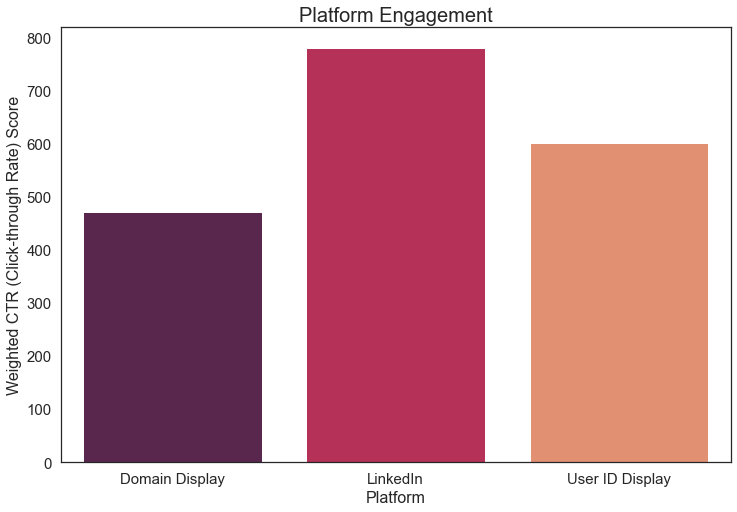

In [477]:
sns.barplot(data=df2_pwctr, x='Platform', y='Weighted_CTR_Score', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Weighted CTR (Click-through Rate) Score', fontsize=16)
plt.title('Platform Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [376]:
df2

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name
501,4 - StackAdapt - Display - Image,Display,0,2022-04-23,366,93,4,Domain Display,CloseFaster,FasterAll,0,0,0,0.000000,0.5,183.0,1.770169,2,CloseFaster
502,4 - StackAdapt - Audio,Audio,0,2022-04-25,366,129,4,Domain Display,CloserTwins,Cutdown1A,0,0,0,0.000000,0.5,183.0,5.021292,2,CloserTwins
506,4 - StackAdapt - Display - Interactive ads (al...,Display - Interactive,0,2022-07-15,366,53,4,Domain Display,CloserTwins,CloseMore,0,0,0,0.000000,0.5,183.0,3.203899,2,CloserTwins
522,5 - StackAdapt - Remarketing - Banner,Display,5,2022-05-08,4576,232,5,Domain Display,UnfairAdvantage,1099,0,0,0,0.001093,0.5,2288.0,22.458325,2,UnfairAdvantage
531,5 - StackAdapt - Remarketing - Banner,Display,0,2022-04-29,33,1,5,Domain Display,UnfairAdvantage,1099,0,0,0,0.000000,0.5,16.5,0.014483,2,UnfairAdvantage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99653,Audience 4 - Carousel Ads,Carousel,79,2022-10-23,22212,0,4,LinkedIn,UnfairAdvantage,All,0,0,0,0.003557,1.0,22212.0,553.230000,2,UnfairAdvantage
99655,Audience 4 - Carousel Ads,Carousel,103,2022-10-24,38051,0,4,LinkedIn,UnfairAdvantage,All,0,0,0,0.002707,0.5,19025.5,836.277933,2,UnfairAdvantage
99656,Audience 5 - DSC,Single image,21,2022-10-24,1291,0,5,LinkedIn,UnfairAdvantage,1099,0,0,0,0.016266,1.5,1936.5,289.039440,2,UnfairAdvantage
99659,Audience 5 - DSC,Single image,9,2022-10-19,680,0,5,LinkedIn,UnfairAdvantage,1099,0,0,0,0.013235,1.5,1020.0,138.223575,2,UnfairAdvantage


In [380]:
df2['CloseFaster_Domain'] = np.where((df2['Creative_Family']=='CloseFaster') & 
                                    (df2['Platform']=='Domain Display'), 
                                     df2['Spend'], 0)

df2['CloseFaster_LinkedIn'] = np.where((df2['Creative_Family']=='CloseFaster') & 
                                       (df2['Platform']=='LinkedIn'), 
                                       df2['Spend'], 0)

df2['CloseFaster_User'] = np.where((df2['Creative_Family']=='CloseFaster') & 
                                   (df2['Platform']=='User ID Display'), 
                                   df2['Spend'], 0)

df2['CloserTwins_Domain'] = np.where((df2['Creative_Family']=='CloserTwins') & 
                                     (df2['Platform']=='Domain Display'), 
                                     df2['Spend'], 0)

df2['CloserTwins_LinkedIn'] = np.where((df2['Creative_Family']=='CloserTwins') & 
                                       (df2['Platform']=='LinkedIn'), 
                                       df2['Spend'], 0)

df2['CloserTwins_User'] = np.where((df2['Creative_Family']=='CloserTwins') & 
                                   (df2['Platform']=='User ID Display'), 
                                   df2['Spend'], 0)

df2['Unfair_Domain'] = np.where((df2['Creative_Family']=='UnfairAdvantage') & 
                                (df2['Platform']=='Domain Display'), 
                                df2['Spend'], 0)

df2['Unfair_LinkedIn'] = np.where((df2['Creative_Family']=='UnfairAdvantage') & 
                                  (df2['Platform']=='LinkedIn'), 
                                  df2['Spend'], 0)

df2['Unfair_User'] = np.where((df2['Creative_Family']=='UnfairAdvantage') & 
                              (df2['Platform']=='User ID Display'), 
                              df2['Spend'], 0)

df2

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,...,Campaign_Name,CloseFaster_Domain,CloseFaster_LinkedIn,CloseFaster_User,CloserTwins_Domain,CloserTwins_LinkedIn,CloserTwins_User,Unfair_Domain,Unfair_LinkedIn,Unfair_User
501,4 - StackAdapt - Display - Image,Display,0,2022-04-23,366,93,4,Domain Display,CloseFaster,FasterAll,...,CloseFaster,1.770169,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
502,4 - StackAdapt - Audio,Audio,0,2022-04-25,366,129,4,Domain Display,CloserTwins,Cutdown1A,...,CloserTwins,0.000000,0.0,0.0,5.021292,0.0,0.0,0.000000,0.000000,0.0
506,4 - StackAdapt - Display - Interactive ads (al...,Display - Interactive,0,2022-07-15,366,53,4,Domain Display,CloserTwins,CloseMore,...,CloserTwins,0.000000,0.0,0.0,3.203899,0.0,0.0,0.000000,0.000000,0.0
522,5 - StackAdapt - Remarketing - Banner,Display,5,2022-05-08,4576,232,5,Domain Display,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,22.458325,0.000000,0.0
531,5 - StackAdapt - Remarketing - Banner,Display,0,2022-04-29,33,1,5,Domain Display,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.014483,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99653,Audience 4 - Carousel Ads,Carousel,79,2022-10-23,22212,0,4,LinkedIn,UnfairAdvantage,All,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,553.230000,0.0
99655,Audience 4 - Carousel Ads,Carousel,103,2022-10-24,38051,0,4,LinkedIn,UnfairAdvantage,All,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,836.277933,0.0
99656,Audience 5 - DSC,Single image,21,2022-10-24,1291,0,5,LinkedIn,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,289.039440,0.0
99659,Audience 5 - DSC,Single image,9,2022-10-19,680,0,5,LinkedIn,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,138.223575,0.0


In [383]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [442]:
# Define the dependent variable.
y = df2['Clicks']  

# Define the independent variable.
X = df2[['CloseFaster_Domain', 'CloseFaster_LinkedIn', 'CloseFaster_User', 
        'CloserTwins_Domain', 'CloserTwins_LinkedIn', 'CloserTwins_User', 
        'Unfair_Domain', 'Unfair_LinkedIn', 'Unfair_User']] 

In [443]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [444]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 0.62285085,  0.50539174,  0.38532615, ..., 19.24531686,
        9.29405131, 39.56874146])

In [445]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.35366194246015936
Intercept:  0.1736614061918227
Coefficients:


[('CloseFaster_Domain', 0.25375512064886774),
 ('CloseFaster_LinkedIn', 0.05076101859872853),
 ('CloseFaster_User', 0.2619691446998567),
 ('CloserTwins_Domain', 0.06606473603098503),
 ('CloserTwins_LinkedIn', 0.0458758836584712),
 ('CloserTwins_User', 0.25543362153032323),
 ('Unfair_Domain', 0.1742215564636753),
 ('Unfair_LinkedIn', 0.06598288259126006),
 ('Unfair_User', 0.23473347276988804)]

In [446]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [447]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     1453.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:40:41   Log-Likelihood:                -77729.
No. Observations:               27930   AIC:                         1.555e+05
Df Residuals:                   27920   BIC:                         1.556e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1804 

In [448]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [449]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [11.1981955   0.3030269   2.81602285 ...  0.3252016   0.24280293
  1.4505886 ]


In [450]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [0.64453224 0.22096094 0.19262949 ... 0.20768197 0.19802616 0.45074172]


In [451]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

63.890410584844574


In [452]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor              features
0        1.21                 const
1        1.00    CloseFaster_Domain
2        1.00  CloseFaster_LinkedIn
3        1.00      CloseFaster_User
4        1.01    CloserTwins_Domain
5        1.00  CloserTwins_LinkedIn
6        1.00      CloserTwins_User
7        1.01         Unfair_Domain
8        1.00       Unfair_LinkedIn
9        1.00           Unfair_User


In [453]:
df2[['Clicks', 'Spend']].sum()

Clicks     38865.000000
Spend     323236.933768
dtype: float64

In [456]:
# Create variables
New_CFD = 80809
New_CFL = 0
New_CFU = 80809
New_CTD = 0
New_CTL = 0
New_CTU = 80809
New_UD = 0
New_UL = 0
New_UU = 80809

# Print the predicted value. 
mlr.predict([[New_CFD, New_CFL, New_CFU, New_CTD, New_CTL, New_CTU, 
             New_UD, New_UL, New_UU]])

array([79088.02676749])

In [310]:
df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.005076,0.0,0.0,0.00,3,Other
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.000527,0.0,0.0,0.00,3,Other
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.007299,0.0,0.0,0.00,3,Other
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,0,0,0,0.000000,0.0,0.0,0.00,3,Other
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,0,0,0,0.000000,0.0,0.0,0.00,3,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3,CloserTwins
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3,CloserTwins
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3,CloserTwins
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3,CloserTwins


In [434]:
df3.loc[df3['Platform']== 'Trade Media', 'Campaign_Name'] = 'CloserTwins'
df3[df3['Platform']=='Trade Media']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,...,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name,Impressions_000s,CloserTwins_OTT,CloserTwins_Trade,CO_Domain,SEM,CO_LinkedIn
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.0,3,CloserTwins,0.197,0.0,0.0,0.0,0.0,0.0
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.0,3,CloserTwins,1.897,0.0,0.0,0.0,0.0,0.0
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.0,3,CloserTwins,0.137,0.0,0.0,0.0,0.0,0.0
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,...,0.0,0.0,3,CloserTwins,0.019,0.0,0.0,0.0,0.0,0.0
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,...,0.0,0.0,3,CloserTwins,0.145,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75162,Housing Wire,Display,0,2022-10-26,534,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.534,0.0,0.0,0.0,0.0,0.0
75163,Housing Wire,Display,0,2022-10-27,427,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.427,0.0,0.0,0.0,0.0,0.0
75164,Housing Wire,Display,0,2022-10-28,265,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.265,0.0,0.0,0.0,0.0,0.0
75165,Housing Wire,Display,0,2022-10-29,26,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.026,0.0,0.0,0.0,0.0,0.0


In [436]:
df3_campaign = df3.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df3_campaign['CPM'] = df3_campaign['Spend'] / (df3_campaign['Impressions'] / 1000)
df3_campaign['CTR'] = (df3_campaign['Clicks'] / df3_campaign['Impressions'])*100
df3_campaign.drop(df3_campaign[df3_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df3_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPM,CTR
0,CloserTwins,445,7914295,260633.910008,32.932044,0.005623
1,CompetitiveOpportunity,373,276361,3261.037592,11.799920,0.134968
3,SEM Ads,12429,66693,8674.350000,130.063875,18.636139


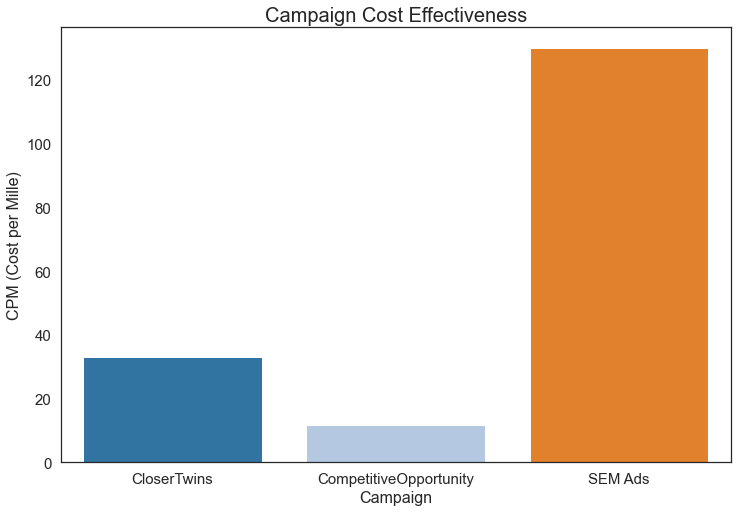

In [437]:
sns.barplot(data=df3_campaign, x='Campaign_Name', y='CPM', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPM (Cost per Mille)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

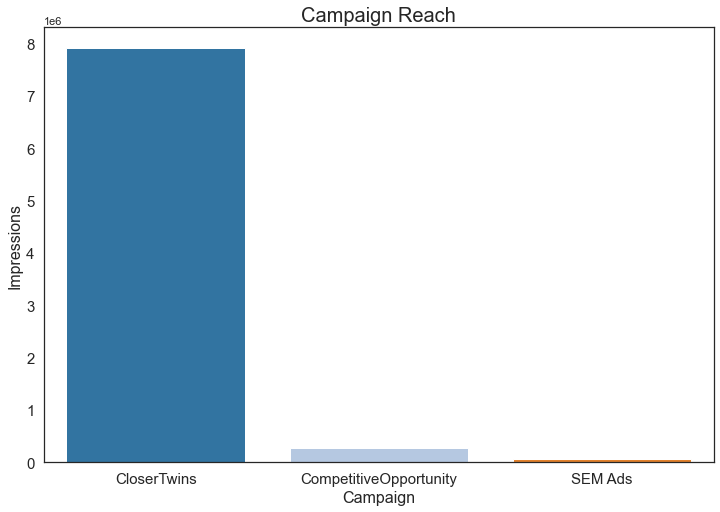

In [438]:
sns.barplot(data=df3_campaign, x='Campaign_Name', y='Impressions', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('Campaign Reach', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [368]:
df3_platform = df3.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df3_platform['CPM'] = df3_platform['Spend'] / (df3_platform['Impressions'] / 1000)
df3_platform['CTR'] = (df3_platform['Clicks'] / df3_platform['Impressions']) * 100
df3_platform

,Platform,Clicks,Impressions,Spend,CPM,CTR
0,Domain Display,263,262110,1275.127592,4.864857,0.100340
1,Google SEM,12429,66693,8674.350000,130.063875,18.636139
2,LinkedIn,1024,1347888,12390.641315,9.192634,0.075971
3,OTT,0,7348177,249833.910000,33.999441,0.000000
4,Trade Media,445,566118,10800.000008,19.077295,0.078606


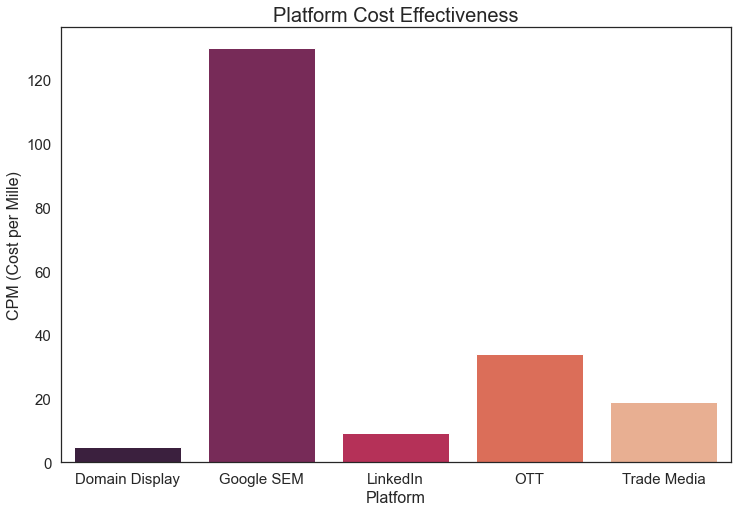

In [365]:
sns.barplot(data=df3_platform, x='Platform', y='CPM', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPM (Cost per Mille)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

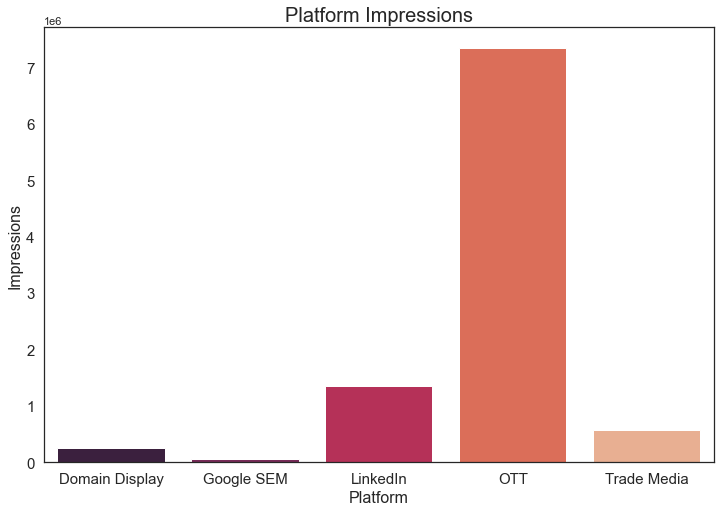

In [367]:
sns.barplot(data=df3_platform, x='Platform', y='Impressions', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('Platform Impressions', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [412]:
df3['CloserTwins_OTT'] = np.where((df3['Creative_Family']=='CloserTwins') & 
                                  (df3['Platform']=='OTT'), 
                                  df3['Spend'], 0)

df3['CloserTwins_Trade'] = np.where(df3['Platform']=='Trade Media', 
                                    df3['Spend'], 0)

df3['CO_Domain'] = np.where((df3['Creative_Family']=='CompetitiveOpportunity') & 
                            (df3['Platform']=='Domain Display'), 
                            df3['Spend'], 0)

df3['CO_LinkedIn'] = np.where((df3['Creative_Family']=='CompetitiveOpportunity') & 
                              (df3['Platform']=='LinkedIn'), 
                              df3['Spend'], 0)

df3['SEM'] = np.where((df3['Creative_Family']=='SEM Ads') & 
                      (df3['Platform']=='Google SEM'), 
                      df3['Spend'], 0)

df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,...,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name,Impressions_000s,CloserTwins_OTT,CloserTwins_Trade,CO_Domain,SEM,CO_LinkedIn
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.00,3,Other,0.197,0.00,0.0,0.0,0.0,0.0
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.00,3,Other,1.897,0.00,0.0,0.0,0.0,0.0
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.00,3,Other,0.137,0.00,0.0,0.0,0.0,0.0
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,...,0.0,0.00,3,Other,0.019,0.00,0.0,0.0,0.0,0.0
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,...,0.0,0.00,3,Other,0.145,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,...,0.0,0.10,3,CloserTwins,0.003,0.10,0.0,0.0,0.0,0.0
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,...,0.0,0.17,3,CloserTwins,0.005,0.17,0.0,0.0,0.0,0.0
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,...,0.0,0.14,3,CloserTwins,0.004,0.14,0.0,0.0,0.0,0.0
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,...,0.0,0.58,3,CloserTwins,0.017,0.58,0.0,0.0,0.0,0.0


In [457]:
# Define the dependent variable.
y = df3['Impressions_000s']  

# Define the independent variable.
X = df3[['CloserTwins_OTT', 'CloserTwins_Trade', 'CO_Domain', 
         'SEM', 'CO_LinkedIn']] 

In [458]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [459]:
# Call the predictions for X (array).
mlr.predict(X) 

array([0.09122618, 0.09122618, 0.09122618, ..., 0.09528818, 0.10805448,
       0.2983884 ])

In [460]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8085644971196451
Intercept:  0.09122617841938085
Coefficients:


[('CloserTwins_OTT', 0.02901431695892079),
 ('CloserTwins_Trade', 0.014162196903928743),
 ('CO_Domain', 0.20352771318024304),
 ('SEM', -0.007260531221957291),
 ('CO_LinkedIn', 0.007480617641072455)]

In [461]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [462]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:       Impressions_000s   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 1.359e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:48:59   Log-Likelihood:                -19666.
No. Observations:               17344   AIC:                         3.934e+04
Df Residuals:                   17338   BIC:                         3.939e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0932      0.00

In [463]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [464]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [0.07150447 0.0980947  0.99801788 ... 0.11983898 0.09403577 0.093166  ]


In [465]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [0.36917336 0.58893553 1.96694289 ... 0.04335177 0.36134542 0.11288081]


In [466]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

85.1686597008358


In [467]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor           features
0        1.12              const
1        1.00    CloserTwins_OTT
2        1.00  CloserTwins_Trade
3        1.00          CO_Domain
4        1.00                SEM
5        1.00        CO_LinkedIn


In [470]:
df3[['Impressions_000s', 'Spend']].sum()

Impressions_000s      9590.986000
Spend               282974.028915
dtype: float64

In [471]:
# Create variables
New_CTO = 0
New_CTT = 0
New_COD = 282974.03
New_SEM = 0
New_COL = 0

# Print the predicted value. 
mlr.predict([[New_CTO, New_CTT, New_COD, New_SEM, New_COL]])

array([57581.81440129])

In [319]:
x1 = df1['Spend']

y1 = df1['Clicks']

f1 = 'y1 ~ x1'
test1 = ols(f1, data = df1).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                 1.843e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:26:42   Log-Likelihood:                -59778.
No. Observations:               45027   AIC:                         1.196e+05
Df Residuals:                   45025   BIC:                         1.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0630      0.005     13.568      0.000       0.054       0.072
x1             0.1122      0.001    135.748      0.000       0.111       0.114
==============================================================================
Omnibus:                    40088.926   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4298949.874
Skew:                           3.844   Prob(JB):                         0.00
Kurtosis:                      50.247   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
x2 = df2['Spend']

y2 = df2['Clicks']

f2 = 'y2 ~ x2'
test2 = ols(f2, data = df2).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                 1.605e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:27:26   Log-Likelihood:                -95361.
No. Observations:               34913   AIC:                         1.907e+05
Df Residuals:                   34911   BIC:                         1.907e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4178      0.021     20.253      0.000       0.377       0.458
x2             0.0751      0.001    126.686      0.000       0.074       0.076
==============================================================================
Omnibus:                   137361.486   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     298256701087.312
Skew:                          96.756   Prob(JB):                         0.00
Kurtosis:                   14320.509   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
df3['Impressions_000s'] = df3['Impressions'] / 1000
df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name,Impressions_000s
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.005076,0.0,0.0,0.00,3,Other,0.197
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.000527,0.0,0.0,0.00,3,Other,1.897
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.007299,0.0,0.0,0.00,3,Other,0.137
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,0,0,0,0.000000,0.0,0.0,0.00,3,Other,0.019
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,0,0,0,0.000000,0.0,0.0,0.00,3,Other,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3,CloserTwins,0.003
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3,CloserTwins,0.005
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3,CloserTwins,0.004
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3,CloserTwins,0.017


In [324]:
x3 = df3['Spend']

y3 = df3['Impressions_000s']

f3 = 'y3 ~ x3'
test3 = ols(f3, data = df3).fit()
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 4.527e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:29:59   Log-Likelihood:                -29840.
No. Observations:               21681   AIC:                         5.968e+04
Df Residuals:                   21679   BIC:                         5.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1374      0.007     20.618      0.000       0.124       0.150
x3             0.0234      0.000    212.765      0.000       0.023       0.024
==============================================================================
Omnibus:                    44665.298   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2828338519.093
Skew:                         -16.182   Prob(JB):                         0.00
Kurtosis:                    1772.127   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [375]:
df.to_csv('Creative_Cleaned.csv', index = False)

In [203]:
from datetime import datetime

In [204]:
df['month'] = df['Date'].dt.month
df

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,month
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1,5
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1,5
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1,5
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1,5
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3,5
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3,5
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3,5
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3,5


In [205]:
clicks_per_month = df.groupby(['month', 'Target_Group'])[['Clicks']].sum().reset_index()
clicks_per_month

,month,Target_Group,Clicks
0,3,3,0
1,4,1,493
2,4,2,782
3,4,3,2931
4,5,1,1548
5,5,2,4801
6,5,3,1917
7,6,1,882
8,6,2,5055
9,6,3,2151


In [206]:
spend_per_month = df.groupby(['month', 'Target_Group'])[['Spend']].sum().reset_index()
spend_per_month

,month,Target_Group,Spend
0,3,3,41965.930000
1,4,1,7077.032468
2,4,2,10712.108922
3,4,3,213218.127592
4,5,1,22866.503784
5,5,2,48142.288165
6,5,3,1707.340000
7,6,1,10588.731143
8,6,2,36270.224384
9,6,3,1782.021121


<AxesSubplot:xlabel='month', ylabel='Clicks'>

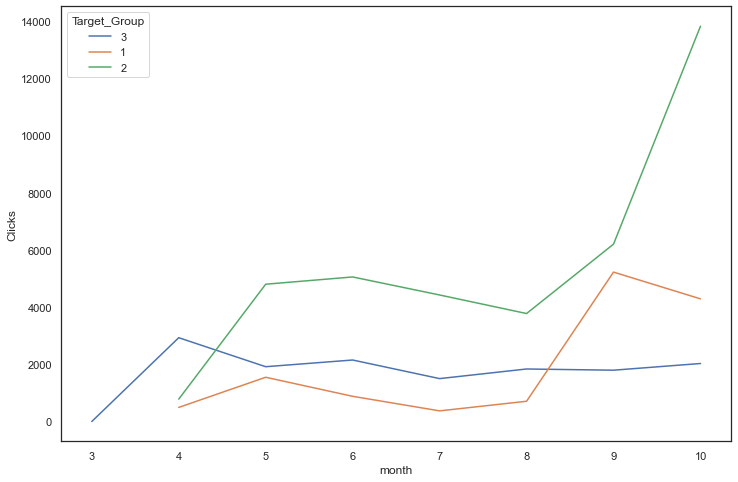

In [207]:
sns.lineplot(x = 'month', y = 'Clicks', hue = 'Target_Group', 
             data = clicks_per_month, ci = None)

<AxesSubplot:xlabel='month', ylabel='Spend'>

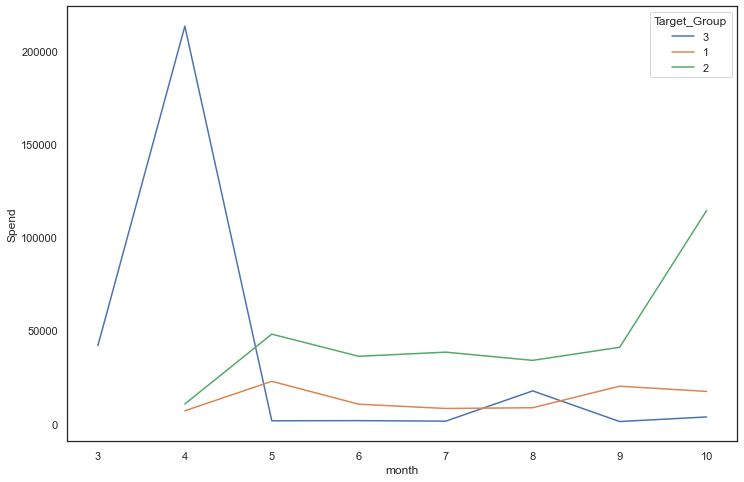

In [208]:
sns.lineplot(x = 'month', y = 'Spend', hue = 'Target_Group', 
             data = spend_per_month, ci = None)

In [211]:
video = df[(df['Ad_Format'] == 'Video') 
           & (df['100%_Video_Views'] > 0)]
video

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,month
13,FY22,Video,0,2022-05-19,72,61,1,Facebook,CloserTwins,Faceoff1,1,39,0,0.000000,0.0,0.0,1.510000,1,5
15,FY22,Video,2,2022-05-19,108,84,1,Facebook,CloserTwins,Faceoff2,1,77,0,0.018519,0.0,0.0,3.100000,1,5
16,FY22,Video,0,2022-05-19,19,17,1,Instagram,CloserTwins,Faceoff2,1,18,0,0.000000,0.0,0.0,0.740000,1,5
19,FY22,Video,0,2022-05-19,144,112,1,Facebook,CloserTwins,Cutdown1B,5,114,0,0.000000,0.0,0.0,4.510000,1,5
35,FY22,Video,0,2022-05-19,46,40,2,Facebook,CloserTwins,Cutdown1B,1,35,0,0.000000,0.0,0.0,1.700000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99404,4 - StackAdapt - Display - Video,Video,0,2022-10-11,1159,56,4,Domain Display,CloserTwins,Cutdown1B,836,1099,0,0.000000,0.5,579.5,17.041875,2,10
99405,4 - StackAdapt - Display - Video,Video,0,2022-10-11,1084,67,4,Domain Display,CloserTwins,Faceoff,737,1006,0,0.000000,0.5,542.0,15.930648,2,10
99467,5 - StackAdapt - Remarketing - Video,Video,0,2022-10-11,2387,170,5,Domain Display,CloserTwins,Cutdown1A,1035,2175,0,0.000000,0.5,1193.5,34.943553,2,10
99468,5 - StackAdapt - Remarketing - Video,Video,0,2022-10-11,2571,161,5,Domain Display,CloserTwins,Cutdown1B,1722,2376,0,0.000000,0.5,1285.5,37.649803,2,10


<AxesSubplot:xlabel='100%_Video_Views', ylabel='Count'>

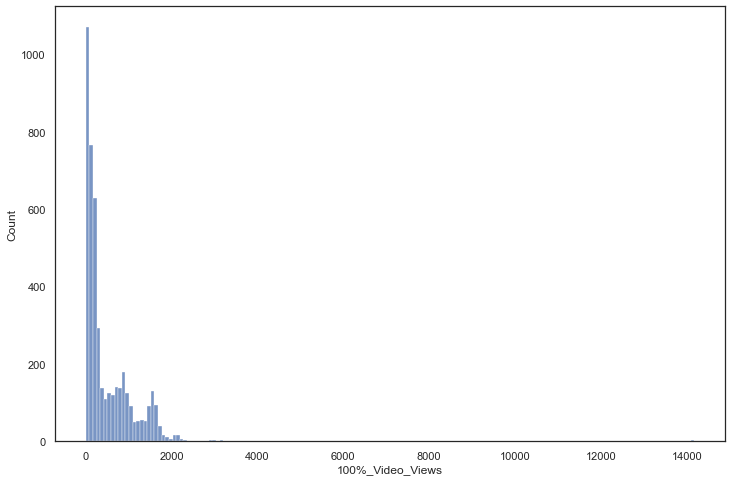

In [212]:
sns.histplot(data=video, x='100%_Video_Views')

In [213]:
video.groupby('Target_Group')[['100%_Video_Views']].sum().reset_index()

,Target_Group,100%_Video_Views
0,1,488538
1,2,1971513


<AxesSubplot:xlabel='Target_Group', ylabel='100%_Video_Views'>

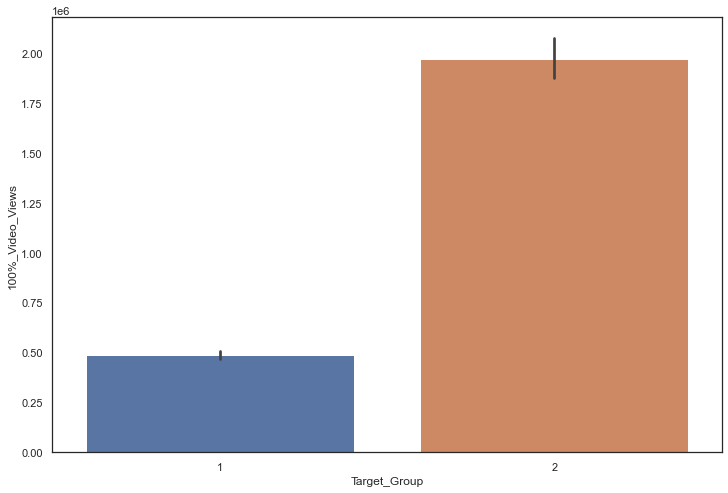

In [225]:
sns.barplot(x='Target_Group', y='100%_Video_Views', data=video, estimator=sum)

In [214]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [ ]:
# df['dates'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# https://datatofish.com/strings-to-datetime-pandas/
#https://datatofish.com/strings-to-datetime-pandas/#:~:text=df%5B%27dates%27%5D%20%3D%20pd.to_datetime(df%5B%27dates%27%5D%2C%20format%3D%27%25d%2D%25b%2D%25Y%27)

In [ ]:
# https://stackoverflow.com/questions/34866856/how-to-replace-all-values-in-a-pandas-dataframe-not-in-a-list